# Amazon Review Analysis

### Data Loading

In [1]:
import pandas as pd




adata=pd.read_csv('Reviews.csv')
adata.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Data Cleaning

In [2]:
adata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [3]:
#column to be cleaned is ProfileName,Time,Summary date conversion
#Time=date conversion

adata['ProfileName']=adata['ProfileName'].fillna('NoData')
adata['Summary']=adata['Summary'].fillna('NoData')
adata['Time']=pd.to_datetime(adata['Time'], unit='s')
adata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      568454 non-null  int64         
 1   ProductId               568454 non-null  object        
 2   UserId                  568454 non-null  object        
 3   ProfileName             568454 non-null  object        
 4   HelpfulnessNumerator    568454 non-null  int64         
 5   HelpfulnessDenominator  568454 non-null  int64         
 6   Score                   568454 non-null  int64         
 7   Time                    568454 non-null  datetime64[ns]
 8   Summary                 568454 non-null  object        
 9   Text                    568454 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 43.4+ MB


In [4]:
adata.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
adata.drop_duplicates(inplace=True)

# Answering Hypothesis

### Review scores are generally positive:What is the distribution of review scores? Analyze the data using Pandas.

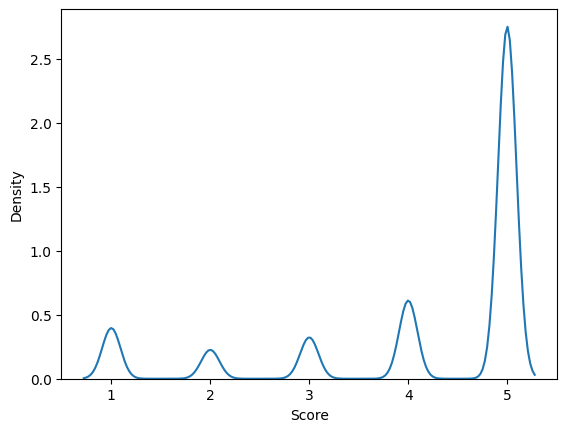

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(adata['Score'])
plt.show()

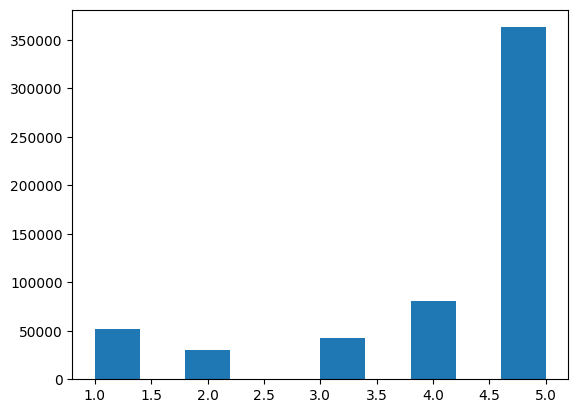

In [7]:
plt.hist(adata['Score'])
plt.show()

In [8]:
adata['Score'].value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

In [9]:
adata.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,568454
mean,284227.500000,1.743817,2.22881,4.183199,2011-01-28 23:16:44.902419712
min,1.000000,0.000000,0.00000,1.000000,1999-10-08 00:00:00
25%,142114.250000,0.000000,0.00000,4.000000,2010-04-15 00:00:00
50%,284227.500000,0.000000,1.00000,5.000000,2011-07-20 00:00:00
75%,426340.750000,2.000000,2.00000,5.000000,2012-03-26 00:00:00
max,568454.000000,866.000000,923.00000,5.000000,2012-10-26 00:00:00
std,164098.679298,7.636513,8.28974,1.310436,NaN


#### Hypothesis Analysis Report

In [10]:
""" According to the Line plot and Histogram plot distribution of majority data of scores column  lies in 5th score which is the maximum value  
the 5th score has frequency of 363122 out of 568454 
so 5th score contributes to 63.87% of review score 
this concludes that the hypothesis is correct that Review scores are generally positive"""

' According to the Line plot and Histogram plot distribution of majority data of scores column  lies in 5th score which is the maximum value  \nthe 5th score has frequency of 363122 out of 568454 \nso 5th score contributes to 63.87% of review score \nthis concludes that the hypothesis is correct that Review scores are generally positive'

### Helpful reviews are often marked as such by many users: How does the helpfulness numerator compare to the helpfulness denominator across reviews? Perform a statistical analysis using NumPy

#### helpfulness numerator and denominator relationship

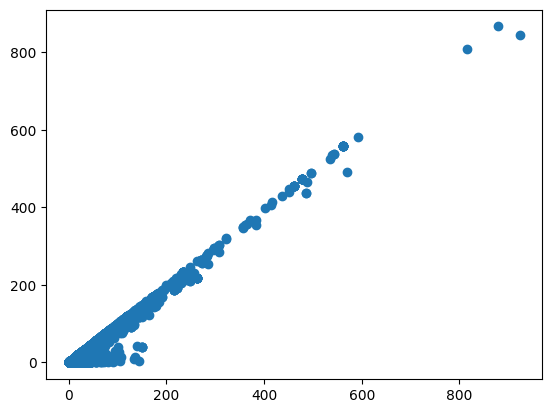

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(adata['HelpfulnessDenominator'],adata['HelpfulnessNumerator'])
plt.show()

In [12]:
adata['helpfulness_ratio']=adata['HelpfulnessNumerator']/adata['HelpfulnessDenominator']

In [13]:
adata.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfulness_ratio
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,NaN


In [14]:
    stats_dict = {
        'mean_ratio': np.mean(adata['helpfulness_ratio']),
        'median_ratio': np.median(adata['helpfulness_ratio']),
        'std_ratio': np.std(adata['helpfulness_ratio']),
        'correlation': np.corrcoef(adata['HelpfulnessNumerator'], adata['HelpfulnessDenominator'])[0,1],
        'total_reviews': len(adata)
    }

In [15]:
stats_dict

{'mean_ratio': 0.7769745358714405,
 'median_ratio': nan,
 'std_ratio': 0.34632082585956464,
 'correlation': 0.9746893287742138,
 'total_reviews': 568454}

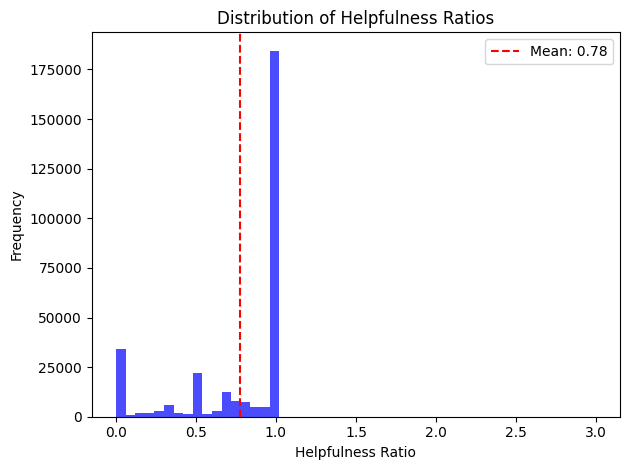

In [16]:
plt.hist(adata['helpfulness_ratio'], bins=50, color='blue', alpha=0.7)
plt.axvline(stats_dict['mean_ratio'], color='red', 
                linestyle='--', label=f"Mean: {stats_dict['mean_ratio']:.2f}")
plt.xlabel('Helpfulness Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Helpfulness Ratios')
plt.legend()
    
plt.tight_layout()
plt.show()

In [17]:
adata['helpfulness_ratio'].value_counts()

helpfulness_ratio
1.000000    183309
0.000000     33774
0.500000     21623
0.666667     10514
0.750000      6364
             ...  
0.946237         1
0.232558         1
0.704545         1
0.161290         1
0.991411         1
Name: count, Length: 951, dtype: int64

#### Hypothesis Analysis Report

In [18]:
""" According to the scatter plot There is a strong positive linear correlation between the two variables. 
As the Helpfulness Denominator increases, the Helpfulness Numerator also increases. 
This suggests that reviews with more total votes (denominator) tend to have more helpful votes (numerator)

The red dashed line represents the mean helpfulness ratio (approximately 0.78). 
This indicates that, on average, about 78% of the votes cast for reviews are marked as helpful.

The histogram shows that most reviews have a helpfulness ratio close to 1, indicating that most of the votes for these reviews were marked as helpful.
So above analysis shows Hypothesis :Helpful reviews are often marked as such by many usersb is True"""


' According to the scatter plot There is a strong positive linear correlation between the two variables. \nAs the Helpfulness Denominator increases, the Helpfulness Numerator also increases. \nThis suggests that reviews with more total votes (denominator) tend to have more helpful votes (numerator)\n\nThe red dashed line represents the mean helpfulness ratio (approximately 0.78). \nThis indicates that, on average, about 78% of the votes cast for reviews are marked as helpful.\n\nThe histogram shows that most reviews have a helpfulness ratio close to 1, indicating that most of the votes for these reviews were marked as helpful.\nSo above analysis shows Hypothesis :Helpful reviews are often marked as such by many usersb is True'

### There are differences in review scores among different products:What are the average review scores for different products? Analyze the data using Pandas

In [19]:
prorev=adata.groupby('ProductId')['Score'].mean().reset_index()
prorev.head()

,ProductId,Score
0,0006641040,4.351351
1,141278509X,5.000000
2,2734888454,3.500000
3,2841233731,5.000000
4,7310172001,4.751445


In [20]:
prorev.tail()

,ProductId,Score
74253,B009UOFTUI,1.0
74254,B009UOFU20,1.0
74255,B009UUS05I,5.0
74256,B009WSNWC4,5.0
74257,B009WVB40S,5.0


In [21]:
prorev['Score'].value_counts()

Score
5.000000    29904
4.000000     7320
3.000000     4614
1.000000     3601
4.500000     2862
            ...  
4.245283        1
4.373134        1
4.087719        1
4.174242        1
2.117647        1
Name: count, Length: 1685, dtype: int64

In [22]:
prorev['Score'].describe()

count    74258.000000
mean         4.166189
std          1.070182
min          1.000000
25%          3.783784
50%          4.500000
75%          5.000000
max          5.000000
Name: Score, dtype: float64

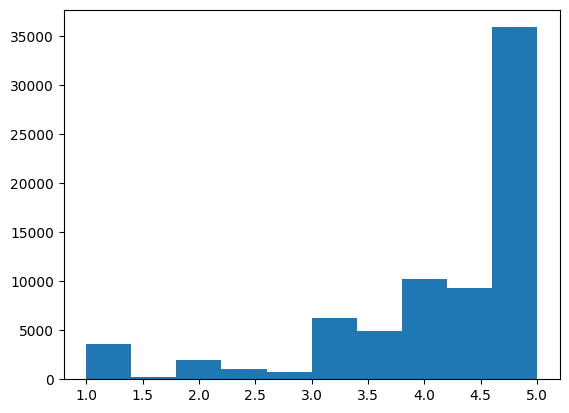

In [23]:
plt.hist(prorev['Score'])
plt.show()

#### Hypothesis Analysis Report

In [24]:
""" As shown below

Score
5.000000    29904
4.000000     7320
3.000000     4614
1.000000     3601
4.500000     2862
            ...  
4.245283        1
4.373134        1
4.087719        1
4.174242        1
2.117647        1

and by analyzing  the histogram it shows even though majority score resides in 5 the data is spread among various scores 
so we can tell that the hypothesis :
There are differences in review scores among different products is true"""


' As shown below\n\nScore\n5.000000    29904\n4.000000     7320\n3.000000     4614\n1.000000     3601\n4.500000     2862\n            ...  \n4.245283        1\n4.373134        1\n4.087719        1\n4.174242        1\n2.117647        1\n\nand by analyzing  the histogram it shows even though majority score resides in 5 the data is spread among various scores \nso we can tell that the hypothesis :\nThere are differences in review scores among different products is true'

### Length of the review text correlates with the review score:Is there a correlation between the length of the review text and the review score? Perform a correlation analysis using Panda

In [25]:
adata.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfulness_ratio
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,NaN


In [26]:
adata['text_len'] = adata['Text'].apply(len)
adata.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfulness_ratio,text_len
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,263
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN,190
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,509
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,1.0,219
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,NaN,140


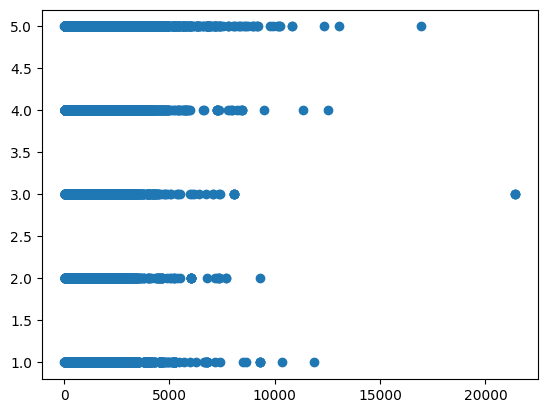

In [27]:
plt.scatter(adata['text_len'],adata['Score'])
plt.show()

In [28]:
correlation = adata['text_len'].corr(adata['Score'])
print(correlation)

-0.07733381425483822


In [29]:
spearman_corr = adata['text_len'].corr(adata['Score'], method='spearman')
print(f"Spearman Correlation: {spearman_corr}")

Spearman Correlation: -0.12305109503337823


#### Hypothesis Analysis Report

In [30]:
""" The correlation value of -0.077 indicates a very weak negative correlation between the two columns.
so the hypothesis Length of the review text correlates with the review score: is false"""

' The correlation value of -0.077 indicates a very weak negative correlation between the two columns.\nso the hypothesis Length of the review text correlates with the review score: is false'

### Certain users are more active in leaving reviews:

In [31]:
rev=adata.groupby('ProfileName')['Score'].count().reset_index()
rev.sort_values(by='Score',ascending=False,inplace=True)
rev.head(10)



,ProfileName,Score
23567,"C. F. Hill ""CFH""",451
130936,"O. Brown ""Ms. O. Khannah-Brown""",421
59551,Gary Peterson,389
144148,"Rebecca of Amazon ""The Rebecca Review""",365
31378,Chris,363
103809,Linda,290
83289,John,261
121926,Mike,260
186777,c2,256
101353,Laura,253


In [32]:
rev['Score'].value_counts()

Score
1      142222
2       29404
3       12790
4        9536
5        5266
        ...  
173         1
176         1
179         1
180         1
451         1
Name: count, Length: 192, dtype: int64

#### Hypothesis Analysis Report

In [33]:
"""

Score
1      142222
2       29404
3       12790
4        9536
5        5266
        ...  
173         1
176         1
179         1
180         1
451         1
Name: count, Length: 192, dtype: int64

As you can see the people who are less active made 1 review throught the data and there are 142222 of them
while the person who made 451 review(which is the highest review count) is only 1 these prove Certain users are more active in leaving reviews 
thus hypothesis true """




'\n\nScore\n1      142222\n2       29404\n3       12790\n4        9536\n5        5266\n        ...  \n173         1\n176         1\n179         1\n180         1\n451         1\nName: count, Length: 192, dtype: int64\n\nAs you can see the people who are less active made 1 review throught the data and there are 142222 of them\nwhile the person who made 451 review(which is the highest review count) is only 1 these prove Certain users are more active in leaving reviews \nthus hypothesis true '

### Reviews have become more detailed over time: How has the average length of reviews changed over time? Perform a time series analysis using Pandas.

In [34]:
adata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      568454 non-null  int64         
 1   ProductId               568454 non-null  object        
 2   UserId                  568454 non-null  object        
 3   ProfileName             568454 non-null  object        
 4   HelpfulnessNumerator    568454 non-null  int64         
 5   HelpfulnessDenominator  568454 non-null  int64         
 6   Score                   568454 non-null  int64         
 7   Time                    568454 non-null  datetime64[ns]
 8   Summary                 568454 non-null  object        
 9   Text                    568454 non-null  object        
 10  helpfulness_ratio       298402 non-null  float64       
 11  text_len                568454 non-null  int64         
dtypes: datetime64[ns](1), float64(

In [35]:
adata['year']=adata['Time'].dt.year
adata.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfulness_ratio,text_len,year
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,263,2011
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN,190,2012
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,509,2008
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,1.0,219,2011
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,NaN,140,2012


In [36]:
alen=adata.groupby('year')['text_len'].mean().reset_index()
alen

,year,text_len
0,1999,269.000000
1,2000,664.562500
2,2001,532.769231
3,2002,769.150685
4,2003,530.916667
5,2004,599.452763
6,2005,535.145318
7,2006,469.911707
8,2007,355.394978
9,2008,415.908702


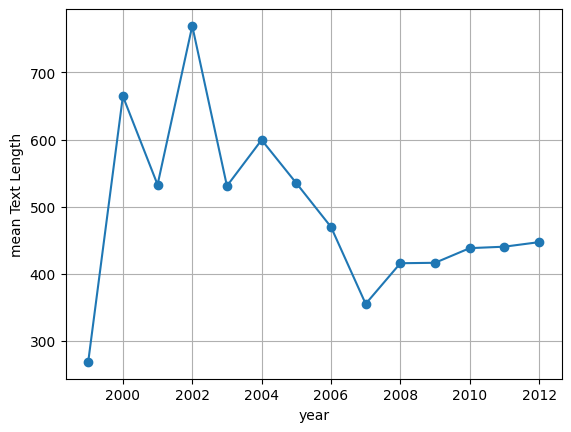

In [37]:
plt.plot(alen['year'],alen['text_len'],marker='o')
plt.grid(True)
plt.xlabel('year')
plt.ylabel('mean Text Length')
plt.show()

#### Hypothesis Analysis Report

In [38]:
""" 

The mean text length peaked around 2002, with subsequent fluctuations and a noticeable decline after 2004.
Post-2006, the text length stabilized at a lower level, showing no significant upward trend.
If reviews were becoming more detailed over time, we would expect a consistent upward trend in the mean text length.
These Means the hypothesis Reviews have become more detailed over time is false """

' \n\nThe mean text length peaked around 2002, with subsequent fluctuations and a noticeable decline after 2004.\nPost-2006, the text length stabilized at a lower level, showing no significant upward trend.\nIf reviews were becoming more detailed over time, we would expect a consistent upward trend in the mean text length.\nThese Means the hypothesis Reviews have become more detailed over time is false '

### High-rated reviews receive more helpfulness votes: Do reviews with higher scores receive more helpfulness votes? Analyze the data using NumPy and Pandas

In [39]:
hv = adata[(adata['helpfulness_ratio'] != 0.000000) & (~adata['helpfulness_ratio'].isna())]
hv.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfulness_ratio,text_len,year
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,263,2011
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,509,2008
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,1.0,219,2011
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,2011-11-23,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,131,2011
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,2005-02-08,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,1.0,779,2005


In [40]:
hv['helpfulness_ratio'].value_counts()

helpfulness_ratio
1.000000    183309
0.500000     21623
0.666667     10514
0.750000      6364
0.333333      5365
             ...  
0.860870         1
0.896226         1
0.915094         1
0.914410         1
0.991411         1
Name: count, Length: 950, dtype: int64

In [41]:
res=hv.groupby('Score')['helpfulness_ratio'].count().reset_index()
res

,Score,helpfulness_ratio
0,1,31942
1,2,14931
2,3,19155
3,4,33859
4,5,164741


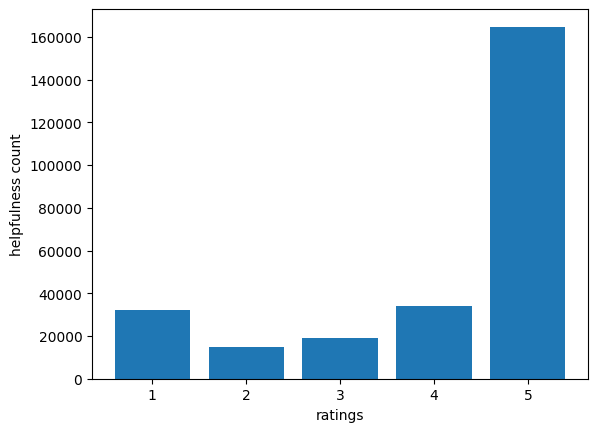

In [42]:
plt.bar(res['Score'],res['helpfulness_ratio'])
plt.xlabel('ratings')
plt.ylabel('helpfulness count')
plt.show()

#### Hypothesis Analysis Report

In [43]:
""" as in above bar chart the rating 5 has more helpfulness than other ratings 
so the hypothesis  High-rated reviews receive more helpfulness votes is true"""

' as in above bar chart the rating 5 has more helpfulness than other ratings \nso the hypothesis  High-rated reviews receive more helpfulness votes is true'

### Products with more reviews tend to have higher average scores:Is there a relationship between the number of reviews a product has and its average score? Perform a statistical analysis using Pandas.

In [44]:
adata.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfulness_ratio,text_len,year
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,263,2011
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN,190,2012
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,509,2008
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,1.0,219,2011
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,NaN,140,2012


In [45]:
pr = adata.groupby('ProductId').agg(
    review_count=('Text', 'count'),  # Count the number of reviews
    avg_score=('Score', 'mean')     # Calculate the average score
).reset_index()
pr.sort_values(by='review_count', ascending=False, inplace=True)

pr

,ProductId,review_count,avg_score
71170,B007JFMH8M,913,4.582694
37898,B0026RQTGE,632,4.588608
42257,B002QWHJOU,632,4.588608
42263,B002QWP89S,632,4.588608
42264,B002QWP8H0,632,4.588608
...,...,...,...
21719,B000YPQC08,1,5.000000
51301,B003YU5T6I,1,5.000000
21720,B000YPQC44,1,5.000000
21721,B000YPQE6U,1,5.000000


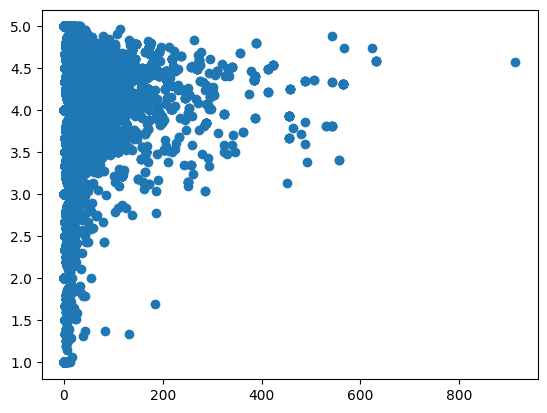

In [46]:
plt.scatter(pr['review_count'],pr['avg_score'])
plt.show()


In [47]:
from scipy import stats
pearson_corr = pr['review_count'].corr(pr['avg_score'])
spearman_corr = stats.spearmanr(pr['review_count'], pr['avg_score'])
kendall_corr = stats.kendalltau(pr['review_count'], pr['avg_score'])
pearson_corr
spearman_corr
kendall_corr

SignificanceResult(statistic=-0.1696748469382458, pvalue=0.0)

In [48]:
spearman_corr

SignificanceResult(statistic=-0.2276678675802709, pvalue=0.0)

In [49]:
kendall_corr

SignificanceResult(statistic=-0.1696748469382458, pvalue=0.0)

#### Hypothesis Analysis Report

In [50]:
"""
71170	B007JFMH8M	913	4.582694
37898	B0026RQTGE	632	4.588608
42257	B002QWHJOU	632	4.588608
42263	B002QWP89S	632	4.588608
42264	B002QWP8H0	632	4.588608
...	...	...	...
21719	B000YPQC08	1	5.000000
51301	B003YU5T6I	1	5.000000
21720	B000YPQC44	1	5.000000
21721	B000YPQE6U	1	5.000000
74257	B009WVB40S	1	5.000000


as you can see the product having 1 review count has 5.0 avg_score while review_count 913 has avg score=4.5
and the corelation between review_count and avg_score is negative 
thus the hypothesis Products with more reviews tend to have higher average scores is false"""



'\n71170\tB007JFMH8M\t913\t4.582694\n37898\tB0026RQTGE\t632\t4.588608\n42257\tB002QWHJOU\t632\t4.588608\n42263\tB002QWP89S\t632\t4.588608\n42264\tB002QWP8H0\t632\t4.588608\n...\t...\t...\t...\n21719\tB000YPQC08\t1\t5.000000\n51301\tB003YU5T6I\t1\t5.000000\n21720\tB000YPQC44\t1\t5.000000\n21721\tB000YPQE6U\t1\t5.000000\n74257\tB009WVB40S\t1\t5.000000\n\n\nas you can see the product having 1 review count has 5.0 avg_score while review_count 913 has avg score=4.5\nand the corelation between review_count and avg_score is negative \nthus the hypothesis Products with more reviews tend to have higher average scores is false'

### Negative reviews are often shorter than positive reviews:How does the length of negative reviews compare to the length of positive reviews? Analyze the data using Pandas.

In [51]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
sent=adata[~(adata['Summary']=='NoData')]
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']  # Compound score: Overall sentiment

# Apply sentiment analysis to each row
sent['sentiment_score'] = sent['Summary'].apply(get_sentiment)

# Classify sentiment as Positive, Negative, or Neutral
sent['sentiment'] = sent['sentiment_score'].apply(
    lambda score: 'Positive' if score > 0.05 else 'Negative' if score < -0.05 else 'Neutral'
)

sent.head()


C:\Users\arjun\AppData\Local\Temp\ipykernel_1764\697581697.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent['sentiment_score'] = sent['Summary'].apply(get_sentiment)
C:\Users\arjun\AppData\Local\Temp\ipykernel_1764\697581697.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent['sentiment'] = sent['sentiment_score'].apply(


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfulness_ratio,text_len,year,sentiment_score,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,263,2011,0.4404,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN,190,2012,0.0000,Neutral
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,509,2008,0.5994,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,1.0,219,2011,0.0000,Neutral
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,NaN,140,2012,0.6249,Positive


In [53]:
ans=sent[~(sent['sentiment']=='Neutral')]
final=ans.groupby('sentiment')['text_len'].mean().reset_index()
final

,sentiment,text_len
0,Negative,520.722392
1,Positive,428.973881


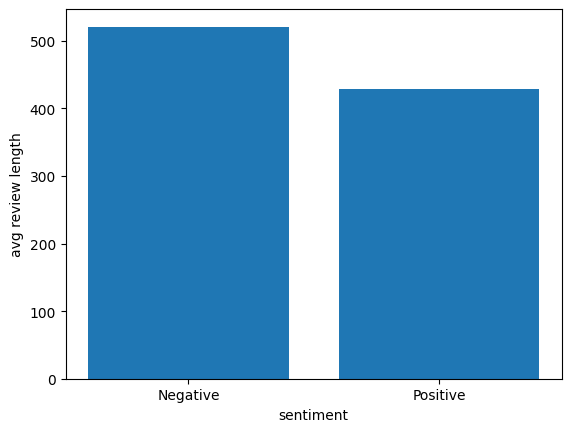

In [54]:
plt.bar(final['sentiment'],final['text_len'])
plt.xlabel('sentiment')
plt.ylabel('avg review length')
plt.show()

#### Hypothesis Analysis Report

In [55]:
 """ 
 By analyzing deeper the average length of a positive review is 428
 while  negative review is 520 
 which means hypothesis Negative reviews are often shorter than positive reviews is false"""

' \nBy analyzing deeper the average length of a positive review is 428\nwhile  negative review is 520 \nwhich means hypothesis Negative reviews are often shorter than positive reviews is false'

### Review scores and helpfulness ratios differ across products:What are the average review scores and helpfulness ratios for the top 10 products? Analyze the data using Pandas.

In [56]:
adata.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfulness_ratio,text_len,year
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,263,2011
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN,190,2012
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,509,2008
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,1.0,219,2011
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,NaN,140,2012


In [57]:
rh=adata[(adata['helpfulness_ratio'] != 0.000000) & (~adata['helpfulness_ratio'].isna())]

res=rh.groupby('ProductId').agg(
      # Count the number of reviews
    avg_score=('Score', 'mean'),
    avg_helpfulness=('helpfulness_ratio', 'mean')# Calculate the average score
).reset_index()
res.head(10)

,ProductId,avg_score,avg_helpfulness
0,0006641040,4.157895,0.939327
1,141278509X,5.000000,1.000000
2,2734888454,2.000000,1.000000
3,7310172001,4.346939,0.880068
4,7310172101,4.346939,0.880068
5,B00002N8SM,1.200000,0.550000
6,B00002Z754,5.000000,1.000000
7,B00004CI84,4.151899,0.798768
8,B00004CXX9,4.000000,0.760465
9,B00004RAMS,3.250000,0.835836


In [58]:
res['avg_score'].value_counts()

avg_score
5.000000    19268
4.000000     4362
3.000000     2838
1.000000     2778
4.500000     1813
            ...  
4.586957        1
3.394737        1
3.707317        1
4.351064        1
4.485714        1
Name: count, Length: 1021, dtype: int64

In [59]:
res['avg_helpfulness'].value_counts()

avg_helpfulness
1.000000    26363
0.500000     1344
0.750000     1157
0.666667      782
0.833333      760
            ...  
0.775510        1
0.803644        1
0.783503        1
0.837912        1
0.866432        1
Name: count, Length: 5197, dtype: int64

In [64]:
res=res.head(10)

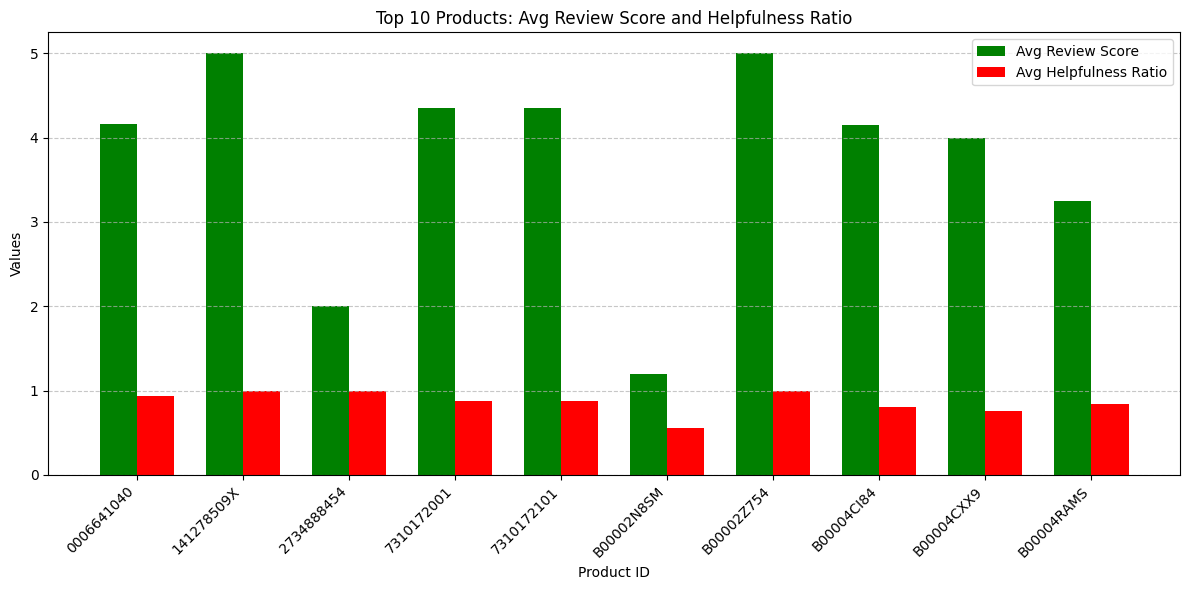

In [65]:
x = np.arange(len(res['ProductId']))  # X-axis positions
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Bars for average review scores
bars1 = ax.bar(x - width/2, res['avg_score'], width, label='Avg Review Score', color='green')

# Bars for average helpfulness ratios
bars2 = ax.bar(x + width/2, res['avg_helpfulness'], width, label='Avg Helpfulness Ratio', color='red')

# Adding labels and title
ax.set_xlabel('Product ID')
ax.set_ylabel('Values')
ax.set_title('Top 10 Products: Avg Review Score and Helpfulness Ratio')
ax.set_xticks(x)
ax.set_xticklabels(res['ProductId'], rotation=45, ha='right')
ax.legend()

# Adding a grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

#### Hypothesis Analysis Report

In [ ]:
""" 
according to the analysis of numbers

5.000000    19268
4.000000     4362
3.000000     2838
1.000000     2778
4.500000     1813
            ...  
4.586957        1
3.394737        1
3.707317        1
4.351064        1
4.485714        1


avg_helpfulness
1.000000    26363
0.500000     1344
0.750000     1157
0.666667      782
0.833333      760
            ...  
0.775510        1
0.803644        1
0.783503        1
0.837912        1
0.866432        1



and above bar plt shows sample of top 10 product there is differ in the helpfulness ratio and review scores between products 
which shows hypothesis review scores and helpfulness ratios differ across products is true """